In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
sns.set()

%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [3]:
df_1 = pd.read_csv('unique_m.csv')
df_1.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [5]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV,KFold
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge,Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl

In [6]:
X = df.drop('critical_temp', axis=1)
y = df['critical_temp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [32]:
mean=X_train.mean(axis=0)
std=X_train.std(axis=0)
X_train=(X_train-mean)/std

In [33]:
# Ridge

In [34]:
clf = Ridge()
cv=KFold(shuffle=True,n_splits=5,random_state=42).split(X_train,y_train)
grid=GridSearchCV(clf,param_grid={'alpha':[0.01,0.05,0.1,0.5,1,5,10],},scoring='r2',cv=cv,)
grid.fit(X_train,y_train)
print (grid.best_score_)
print (grid.best_params_)
#print(np.sqrt(mean_squared_error(y_test, clf.predict((X_test-mean)/std))))
#print (clf.score((X_test-mean)/std,y_test))

0.7370295204641086
{'alpha': 0.1}


In [35]:
clf=Ridge(**grid.best_params_)
clf.fit(X_train,y_train)
print(mean_squared_error(y_test,clf.predict((X_test-mean)/std))**0.5)
print(r2_score(y_test,clf.predict((X_test-mean)/std)))

17.712726161571336
0.7302216729955191


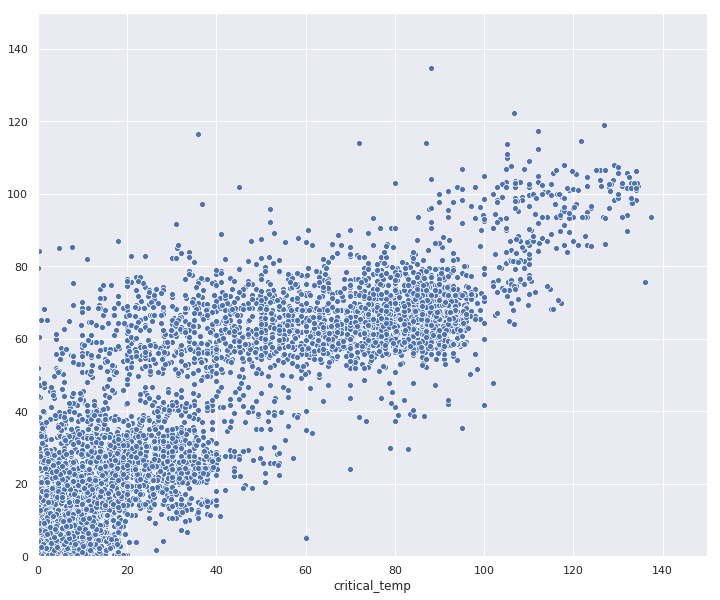

In [36]:
plt.figure(figsize=(12,10))
fig=sns.scatterplot(x=y_test,y=clf.predict((X_test-mean)/std));
axes = fig.axes
axes.set_ylim(0,150)
axes.set_xlim(0,150);

In [37]:
args=np.argsort(clf.coef_)
feature_imp=[x for x in zip(X_train.columns[args],clf.coef_[args])]
feature_imp[::-1]

[('wtd_mean_atomic_radius', 76.97763375592457),
 ('std_ElectronAffinity', 27.57746034375716),
 ('entropy_Valence', 27.50444758665934),
 ('mean_atomic_mass', 26.16542060606582),
 ('wtd_mean_Valence', 25.404182694460335),
 ('wtd_mean_ThermalConductivity', 25.248356457811227),
 ('gmean_Valence', 24.748847102890362),
 ('wtd_gmean_atomic_mass', 23.918924749255158),
 ('wtd_gmean_FusionHeat', 21.38629961334131),
 ('mean_FusionHeat', 20.97740459017504),
 ('range_fie', 20.028627746968894),
 ('wtd_mean_ElectronAffinity', 18.422549592342946),
 ('wtd_entropy_atomic_radius', 17.347475707919358),
 ('std_ThermalConductivity', 17.162023510561436),
 ('entropy_atomic_radius', 16.511629672531214),
 ('range_atomic_radius', 14.796527643275477),
 ('wtd_entropy_fie', 13.768606024533312),
 ('std_Density', 11.637568695576318),
 ('range_atomic_mass', 11.309764687426602),
 ('wtd_entropy_FusionHeat', 9.550651487587663),
 ('mean_fie', 8.779985931022056),
 ('wtd_range_FusionHeat', 7.2279252070118325),
 ('wtd_gmean_

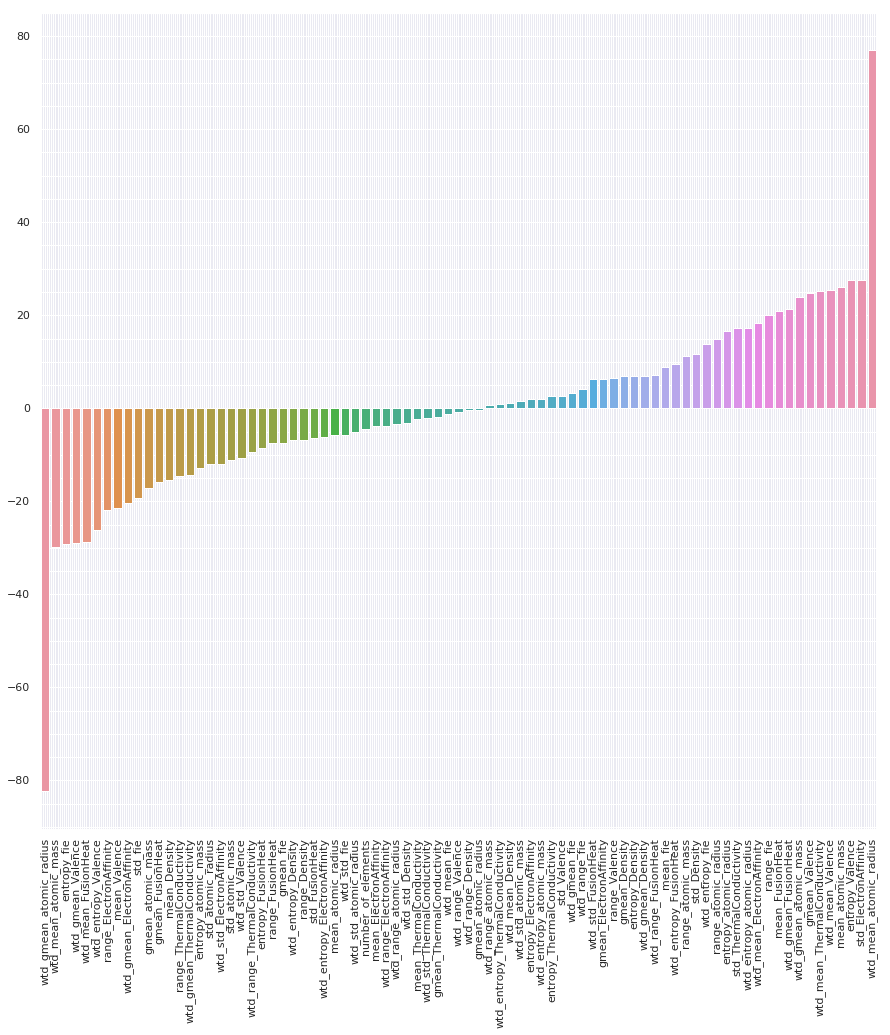

In [38]:

plt.figure(figsize=(15,15))

fig=sns.barplot(x=[x[0] for x in feature_imp],y=[x[1] for x in feature_imp])
fig.set_xticklabels([x[0] for x in feature_imp],rotation=90);
fig.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
fig.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
fig.grid(b=True, which='major', color='w', linewidth=1.0)
fig.grid(b=True, which='minor', color='w', linewidth=1.0)

In [39]:
feature_imp[-10:]

[('mean_FusionHeat', 20.97740459017504),
 ('wtd_gmean_FusionHeat', 21.38629961334131),
 ('wtd_gmean_atomic_mass', 23.918924749255158),
 ('gmean_Valence', 24.748847102890362),
 ('wtd_mean_ThermalConductivity', 25.248356457811227),
 ('wtd_mean_Valence', 25.404182694460335),
 ('mean_atomic_mass', 26.16542060606582),
 ('entropy_Valence', 27.50444758665934),
 ('std_ElectronAffinity', 27.57746034375716),
 ('wtd_mean_atomic_radius', 76.97763375592457)]

In [40]:
feature_imp[:10]

[('wtd_gmean_atomic_radius', -82.38207393461911),
 ('wtd_mean_atomic_mass', -29.926502184311598),
 ('entropy_fie', -29.259747866043465),
 ('wtd_gmean_Valence', -28.88441904877293),
 ('wtd_mean_FusionHeat', -28.707188377769032),
 ('wtd_entropy_Valence', -26.139517709376133),
 ('range_ElectronAffinity', -21.9267128196661),
 ('mean_Valence', -21.41699874958747),
 ('wtd_gmean_ElectronAffinity', -20.29060981667016),
 ('std_fie', -19.37171639073624)]

In [41]:
tops=np.array((feature_imp[:10],feature_imp[-10:])).reshape((20,2))
tops

array([['wtd_gmean_atomic_radius', '-82.38207393461911'],
       ['wtd_mean_atomic_mass', '-29.926502184311598'],
       ['entropy_fie', '-29.259747866043465'],
       ['wtd_gmean_Valence', '-28.88441904877293'],
       ['wtd_mean_FusionHeat', '-28.707188377769032'],
       ['wtd_entropy_Valence', '-26.139517709376133'],
       ['range_ElectronAffinity', '-21.9267128196661'],
       ['mean_Valence', '-21.41699874958747'],
       ['wtd_gmean_ElectronAffinity', '-20.29060981667016'],
       ['std_fie', '-19.37171639073624'],
       ['mean_FusionHeat', '20.97740459017504'],
       ['wtd_gmean_FusionHeat', '21.38629961334131'],
       ['wtd_gmean_atomic_mass', '23.918924749255158'],
       ['gmean_Valence', '24.748847102890362'],
       ['wtd_mean_ThermalConductivity', '25.248356457811227'],
       ['wtd_mean_Valence', '25.404182694460335'],
       ['mean_atomic_mass', '26.16542060606582'],
       ['entropy_Valence', '27.50444758665934'],
       ['std_ElectronAffinity', '27.57746034375716'

In [42]:
# Lasso

In [43]:
clf = Lasso()
cv=KFold(shuffle=True,n_splits=5,random_state=42).split(X_train,y_train)
grid=GridSearchCV(clf,param_grid={'alpha':[0.01,0.05,0.1,0.5,1,5,10],},scoring='r2',cv=cv,)
grid.fit(X_train,y_train)
print (grid.best_score_)
print (grid.best_params_)
#print(np.sqrt(mean_squared_error(y_test, clf.predict((X_test-mean)/std))))
#print (clf.score((X_test-mean)/std,y_test))

0.7337271430055051
{'alpha': 0.01}


In [44]:
clf=Lasso(**grid.best_params_)
clf.fit(X_train,y_train)
print(mean_squared_error(y_test,clf.predict((X_test-mean)/std))**0.5)
print(r2_score(y_test,clf.predict((X_test-mean)/std)))

17.816929583727823
0.7270381409812926


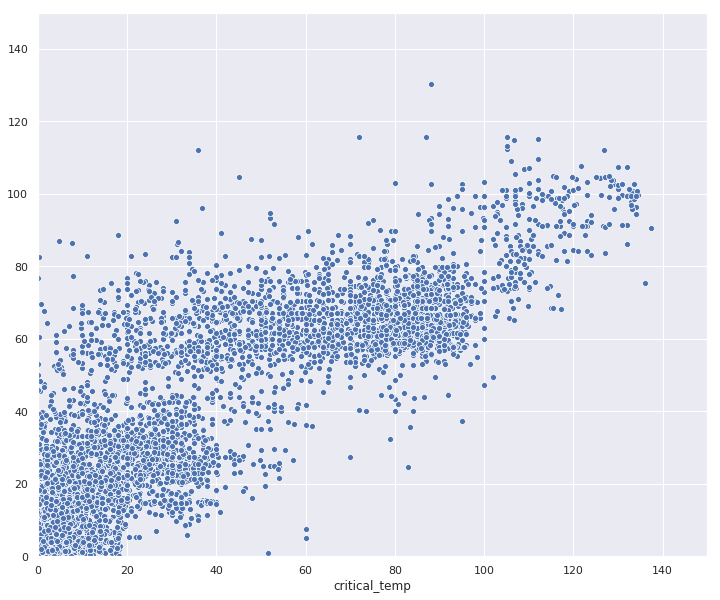

In [45]:
plt.figure(figsize=(12,10))
fig=sns.scatterplot(x=y_test,y=clf.predict((X_test-mean)/std));
axes = fig.axes
axes.set_ylim(0,150)
axes.set_xlim(0,150);

In [46]:
args=np.argsort(clf.coef_)
feature_imp=[x for x in zip(X_train.columns[args],clf.coef_[args])]
feature_imp[::-1]

[('std_ElectronAffinity', 26.118106397043718),
 ('wtd_mean_ThermalConductivity', 21.97755984788487),
 ('range_fie', 19.278594677627822),
 ('mean_atomic_radius', 18.309570534265774),
 ('wtd_mean_ElectronAffinity', 17.606038270358333),
 ('entropy_fie', 16.589467943022157),
 ('range_atomic_radius', 15.447485705396021),
 ('wtd_mean_atomic_radius', 14.79496023150604),
 ('wtd_entropy_fie', 10.981721842168692),
 ('std_ThermalConductivity', 9.74444079394241),
 ('range_atomic_mass', 9.642699523997504),
 ('mean_atomic_mass', 9.205248788993813),
 ('wtd_gmean_Density', 9.179709114240314),
 ('wtd_std_atomic_radius', 8.913283743614853),
 ('wtd_entropy_FusionHeat', 8.477570755628891),
 ('wtd_entropy_atomic_radius', 8.283689286866968),
 ('std_Density', 7.498379854253002),
 ('gmean_ElectronAffinity', 5.520527498782866),
 ('gmean_Valence', 5.385854338795308),
 ('mean_FusionHeat', 5.384015140695601),
 ('wtd_range_FusionHeat', 5.289967603183066),
 ('range_Valence', 5.081413707711078),
 ('wtd_entropy_atomi

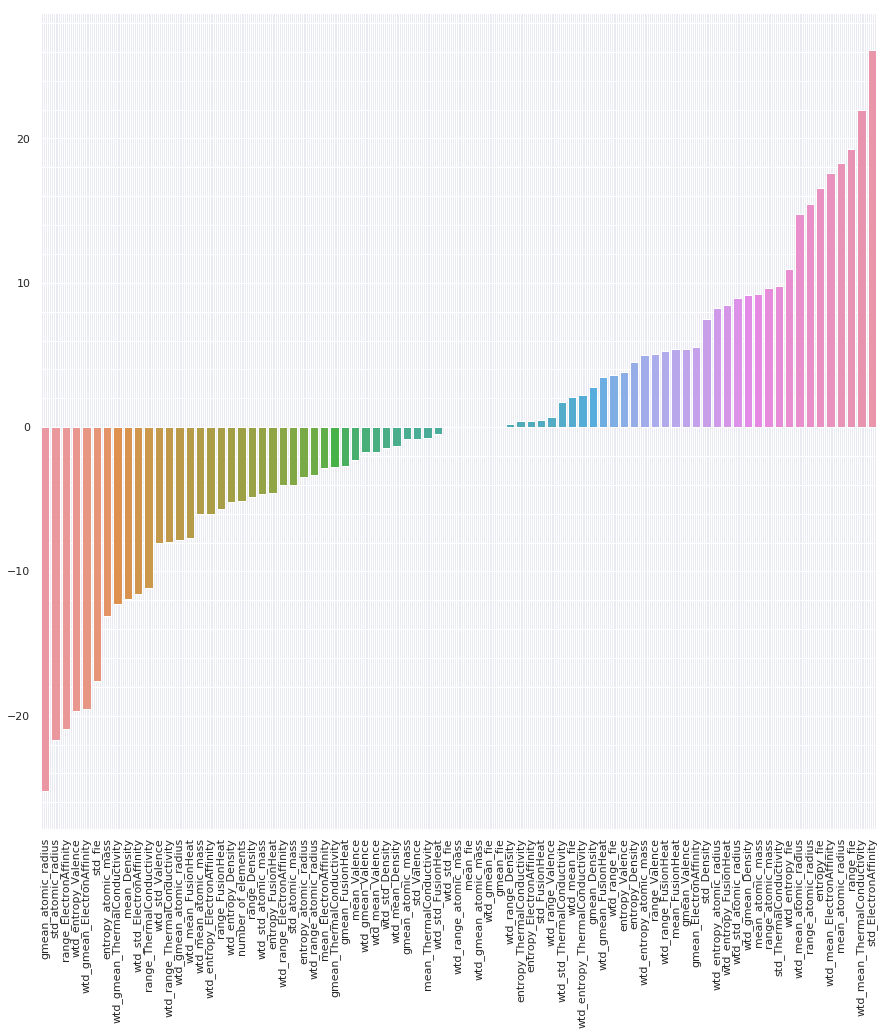

In [47]:

plt.figure(figsize=(15,15))

fig=sns.barplot(x=[x[0] for x in feature_imp],y=[x[1] for x in feature_imp])
fig.set_xticklabels([x[0] for x in feature_imp],rotation=90);
fig.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
fig.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
fig.grid(b=True, which='major', color='w', linewidth=1.0)
fig.grid(b=True, which='minor', color='w', linewidth=1.0)

In [ ]:
# Let's try decision tree and let's take a look on feature importance

In [56]:
X = df.drop('critical_temp', axis=1)
y = df['critical_temp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [199]:
clf=DecisionTreeRegressor(random_state=42)
cv=KFold(shuffle=True,n_splits=5).split(X_train,y_train)
params={ 'criterion':['mse','mae'],
        'splitter':['best','random'],
        'max_features':['sqrt','log2','auto'],
    
}
grid=GridSearchCV(clf,param_grid=params,scoring='r2',cv=cv,)
grid.fit(X_train,y_train)
print (grid.best_score_)
print (grid.best_params_)

0.8613079754677343
{'criterion': 'mse', 'max_features': 'auto', 'splitter': 'random'}


In [202]:
# best params {'criterion': 'mse', 'max_features': 'auto', 'splitter': 'random'}

In [58]:
#clf=DecisionTreeRegressor(**grid.best_params_)
clf=DecisionTreeRegressor(**{'criterion': 'mse', 'max_features': 'auto', 'splitter': 'random'})
clf.fit(X_train,y_train)
print(mean_squared_error(y_test,clf.predict(X_test))**0.5)
print(r2_score(y_test,clf.predict(X_test)))

12.223744996864498
0.8715172561041085


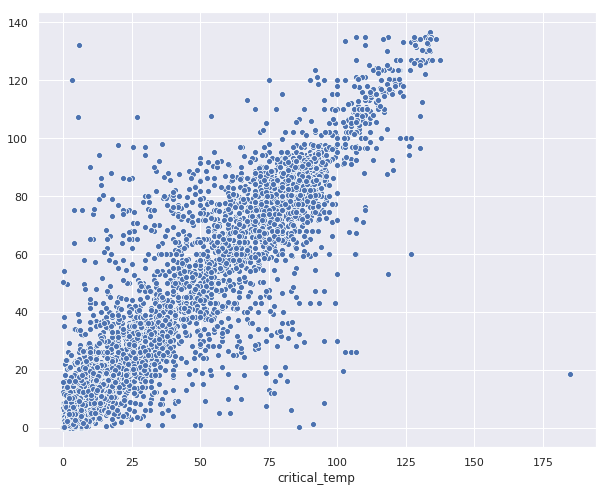

In [59]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=y_test,y=clf.predict(X_test),);

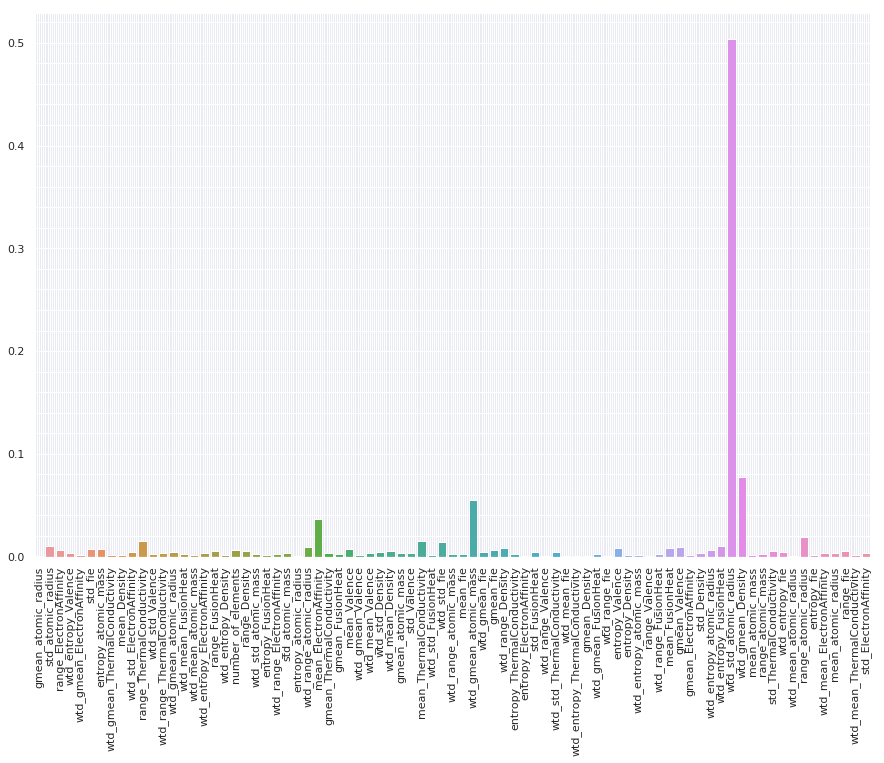

In [60]:

plt.figure(figsize=(15,10))

fig=sns.barplot(x=X_train.columns,y=clf.feature_importances_)
fig.set_xticklabels([x[0] for x in feature_imp],rotation=90);
fig.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
fig.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
fig.grid(b=True, which='major', color='w', linewidth=1.0)
fig.grid(b=True, which='minor', color='w', linewidth=1.0)

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
clf=RandomForestRegressor(random_state=42)
cv=KFold(shuffle=True,n_splits=5).split(X_train,y_train)
params={ 'n_estimators':[100,500,1000],
        'criterion':['mse','mae'],
        'max_features':['sqrt','log2'],
}
grid=GridSearchCV(clf,param_grid=params,scoring='r2',cv=cv,)
grid.fit(X_train,y_train)
print (grid.best_score_)
print (grid.best_params_)

0.9203380451048251
{'criterion': 'mse', 'max_features': 'sqrt', 'n_estimators': 1000}


In [ ]:
# best params {'criterion': 'mse', 'max_features': 'sqrt', 'n_estimators': 1000}
# test results 
#9.486969533821513
#0.9226088585911328

In [93]:
grid.best_params_

{'criterion': 'mse', 'max_features': 'sqrt', 'n_estimators': 1000}

In [94]:
clf=RandomForestRegressor(**grid.best_params_)
clf.fit(X_train,y_train)
print(mean_squared_error(y_test,clf.predict(X_test))**0.5)
print(r2_score(y_test,clf.predict(X_test)))

9.504829808514424
0.9223171894469544


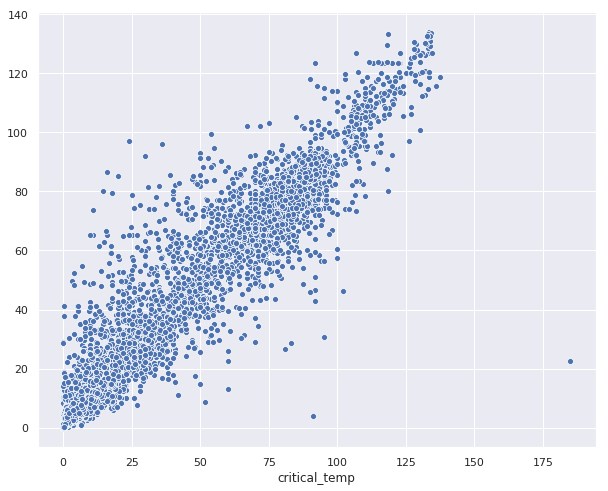

In [95]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=y_test,y=clf.predict(X_test),);

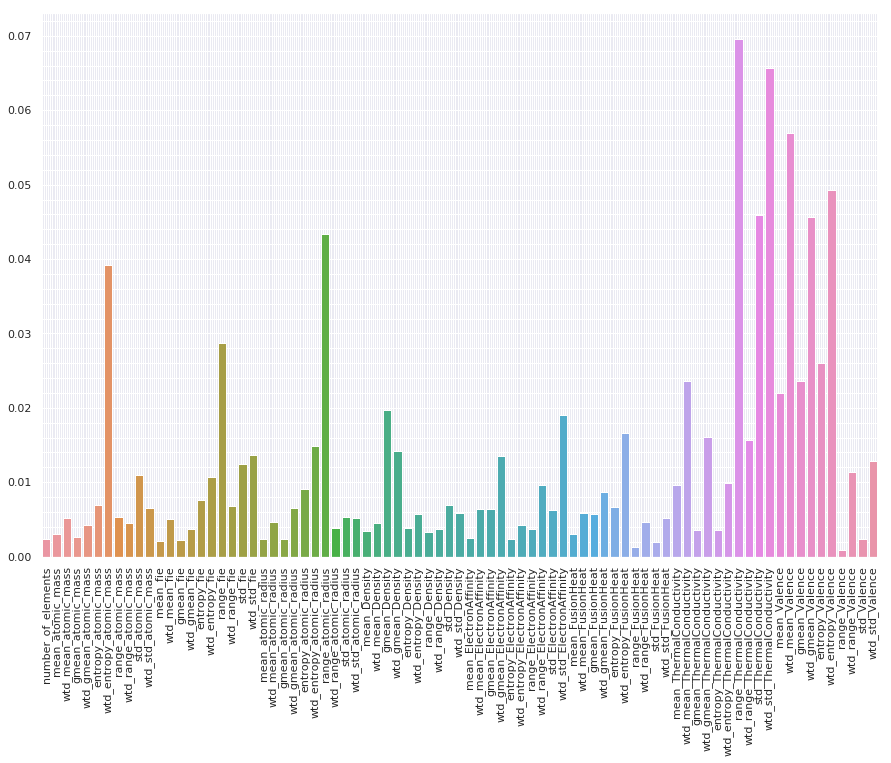

In [102]:

plt.figure(figsize=(15,10))

fig=sns.barplot(x=X_train.columns,y=clf.feature_importances_)
fig.set_xticklabels(X_train.columns,rotation=90);
fig.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
fig.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
fig.grid(b=True, which='major', color='w', linewidth=1.0)
fig.grid(b=True, which='minor', color='w', linewidth=1.0)

In [103]:
list1=X_train.columns[clf.feature_importances_>0.01]
list1

Index(['wtd_entropy_atomic_mass', 'std_atomic_mass', 'wtd_entropy_fie',
       'range_fie', 'std_fie', 'wtd_std_fie', 'wtd_entropy_atomic_radius',
       'range_atomic_radius', 'gmean_Density', 'wtd_gmean_Density',
       'wtd_gmean_ElectronAffinity', 'wtd_std_ElectronAffinity',
       'wtd_entropy_FusionHeat', 'wtd_mean_ThermalConductivity',
       'wtd_gmean_ThermalConductivity', 'range_ThermalConductivity',
       'wtd_range_ThermalConductivity', 'std_ThermalConductivity',
       'wtd_std_ThermalConductivity', 'mean_Valence', 'wtd_mean_Valence',
       'gmean_Valence', 'wtd_gmean_Valence', 'entropy_Valence',
       'wtd_entropy_Valence', 'wtd_range_Valence', 'wtd_std_Valence'],
      dtype='object')

In [86]:
# XGBoost

In [104]:
clf = XGBRegressor(max_depth=16, learning_rate=0.02, n_estimators=380, colsample_bytree=0.5)
clf.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=16, min_child_weight=1, missing=None, n_estimators=380,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [105]:
print(np.sqrt(mean_squared_error(y_test, clf.predict(X_test))))
print(r2_score(y_test,clf.predict(X_test)))

9.435293120052595
0.9234496759583893


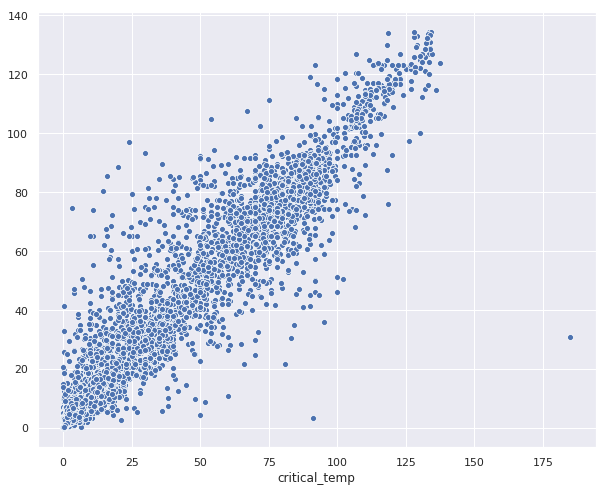

In [106]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=y_test,y=clf.predict(X_test),);

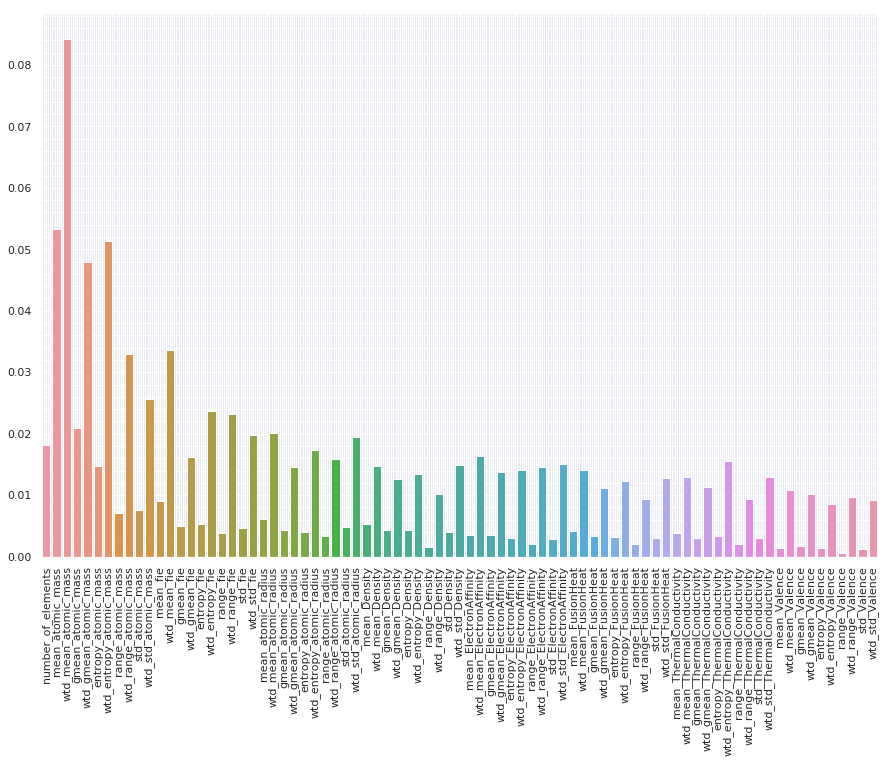

In [107]:

plt.figure(figsize=(15,10))

fig=sns.barplot(x=X_train.columns,y=clf.feature_importances_)
fig.set_xticklabels(X_train.columns,rotation=90);
fig.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
fig.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
fig.grid(b=True, which='major', color='w', linewidth=1.0)
fig.grid(b=True, which='minor', color='w', linewidth=1.0)

In [108]:
list2=X_train.columns[clf.feature_importances_>0.01]
list2

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'wtd_range_atomic_mass',
       'wtd_std_atomic_mass', 'wtd_mean_fie', 'wtd_gmean_fie',
       'wtd_entropy_fie', 'wtd_range_fie', 'wtd_std_fie',
       'wtd_mean_atomic_radius', 'wtd_gmean_atomic_radius',
       'wtd_entropy_atomic_radius', 'wtd_range_atomic_radius',
       'wtd_std_atomic_radius', 'wtd_mean_Density', 'wtd_gmean_Density',
       'wtd_entropy_Density', 'wtd_range_Density', 'wtd_std_Density',
       'wtd_mean_ElectronAffinity', 'wtd_gmean_ElectronAffinity',
       'wtd_entropy_ElectronAffinity', 'wtd_range_ElectronAffinity',
       'wtd_std_ElectronAffinity', 'wtd_mean_FusionHeat',
       'wtd_gmean_FusionHeat', 'wtd_entropy_FusionHeat', 'wtd_std_FusionHeat',
       'wtd_mean_ThermalConductivity', 'wtd_gmean_ThermalConductivity',
       'wtd_entropy_ThermalConductivity', 'wtd_std_ThermalCon

In [109]:
# list1=['wtd_entropy_atomic_mass', 'std_atomic_mass', 'wtd_entropy_fie',
#        'range_fie', 'std_fie', 'wtd_std_fie', 'wtd_entropy_atomic_radius',
#        'range_atomic_radius', 'gmean_Density', 'wtd_gmean_Density',
#        'wtd_gmean_ElectronAffinity', 'wtd_std_ElectronAffinity',
#        'wtd_entropy_FusionHeat', 'wtd_mean_ThermalConductivity',
#        'wtd_gmean_ThermalConductivity', 'range_ThermalConductivity',
#        'wtd_range_ThermalConductivity', 'std_ThermalConductivity',
#        'wtd_std_ThermalConductivity', 'mean_Valence', 'wtd_mean_Valence',
#        'gmean_Valence', 'wtd_gmean_Valence', 'entropy_Valence',
#        'wtd_entropy_Valence', 'wtd_range_Valence', 'wtd_std_Valence']
# list2=['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
#        'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
#        'wtd_entropy_atomic_mass', 'wtd_range_atomic_mass',
#        'wtd_std_atomic_mass', 'wtd_mean_fie', 'wtd_gmean_fie',
#        'wtd_entropy_fie', 'wtd_range_fie', 'wtd_std_fie',
#        'wtd_mean_atomic_radius', 'wtd_gmean_atomic_radius',
#        'wtd_entropy_atomic_radius', 'wtd_range_atomic_radius',
#        'wtd_std_atomic_radius', 'wtd_mean_Density', 'wtd_gmean_Density',
#        'wtd_entropy_Density', 'wtd_range_Density', 'wtd_std_Density',
#        'wtd_mean_ElectronAffinity', 'wtd_gmean_ElectronAffinity',
#        'wtd_entropy_ElectronAffinity', 'wtd_range_ElectronAffinity',
#        'wtd_std_ElectronAffinity', 'wtd_mean_FusionHeat',
#        'wtd_gmean_FusionHeat', 'wtd_entropy_FusionHeat', 'wtd_std_FusionHeat',
#        'wtd_mean_ThermalConductivity', 'wtd_gmean_ThermalConductivity',
#        'wtd_entropy_ThermalConductivity', 'wtd_std_ThermalConductivity',
#        'wtd_mean_Valence', 'wtd_gmean_Valence']

In [110]:
list(set(list1).intersection(list2))

['wtd_gmean_Valence',
 'wtd_entropy_FusionHeat',
 'wtd_mean_Valence',
 'wtd_entropy_atomic_radius',
 'wtd_gmean_ThermalConductivity',
 'wtd_std_fie',
 'wtd_std_ThermalConductivity',
 'wtd_gmean_ElectronAffinity',
 'wtd_entropy_atomic_mass',
 'wtd_gmean_Density',
 'wtd_entropy_fie',
 'wtd_std_ElectronAffinity',
 'wtd_mean_ThermalConductivity']

In [7]:
from catboost import CatBoostRegressor

In [ ]:
clf=CatBoostRegressor(random_state=42,verbose=False)
cv=KFold(shuffle=True,n_splits=5).split(X_train,y_train)
params={ 'iterations':[10],
        'eta':[0.01,0.05,0.1,0.5,1],
        'depth':[10,15,20,25],
        #'max_features':['sqrt','log2'],
        'colsample_bylevel':[0.5,1],
}
grid=GridSearchCV(clf,param_grid=params,scoring='r2',cv=cv,)
grid.fit(X_train,y_train)
print (grid.best_score_)
print (grid.best_params_)

In [ ]:
clf.fit(X_train,y_train)
print(np.sqrt(mean_squared_error(y_test, clf.predict(X_test))))
print(r2_score(y_test,clf.predict(X_test)))